In [1]:
import json
import numpy as np
import os
import glob
from matplotlib import pyplot as plt

## Read dataset

In [2]:
data_list = glob.glob(os.path.join('../tracking_dataset_v01-01/', "*.json"))

In [3]:
kick_list = []
for data_item in data_list:

    with open(data_item, 'r') as input_file:
        track_dict = json.load(input_file)

    start_time = track_dict['0']['time']
    start_pos = track_dict['0']['gt_ball_global']
    kick_data = np.array([[start_time,*start_pos]])

    for step in list(track_dict.values())[1:]:
        kick_data = np.concatenate([kick_data, np.asarray([[step['time'],*step['gt_ball_global']]])], axis=0)

    kick_data = kick_data-kick_data[0]
    kick_list.append(kick_data)

## Process dataset

In [4]:
kick_heights = []
kick_dists = []
for kick in kick_list:
    kick_heights.append(np.max(kick[...,-1]))
    kick_dists.append(np.linalg.norm([kick[-1,1], kick[-1,1]], axis=0))
kick_heights = np.array(kick_heights)
kick_dists = np.array(kick_dists)

In [5]:
## Plot dataset

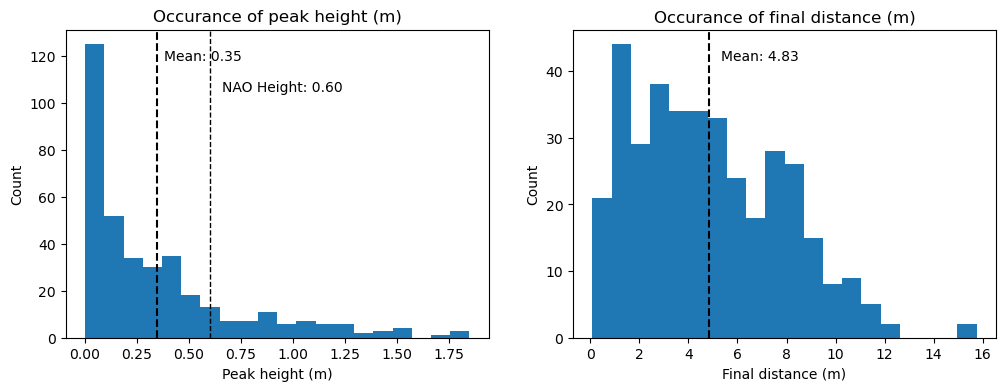

In [6]:
NAO_HEIGHT = 0.6
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=False)
ax=axes.ravel()

ax[0].hist(kick_heights, bins=20)
ax[0].set_title("Occurance of peak height (m)")
ax[0].set_xlabel("Peak height (m)")
ax[0].set_ylabel("Count")
min_ylim, max_ylim = ax[0].axis()[-2:]
ax[0].axvline(kick_heights.mean(), color='k', linestyle='dashed', linewidth=1.5)
ax[0].text(kick_heights.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(kick_heights.mean()))
ax[0].axvline(NAO_HEIGHT, color='k', linestyle='dashed', linewidth=1)
ax[0].text(NAO_HEIGHT*1.1, max_ylim*0.8, 'NAO Height: {:.2f}'.format(NAO_HEIGHT))

ax[1].hist(kick_dists, bins=20)
ax[1].set_title("Occurance of final distance (m)")
ax[1].set_xlabel("Final distance (m)")
ax[1].set_ylabel("Count")
min_ylim, max_ylim = ax[1].axis()[-2:]
ax[1].axvline(kick_dists.mean(), color='k', linestyle='dashed', linewidth=1.5)
ax[1].text(kick_dists.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(kick_dists.mean()))

plt.show()

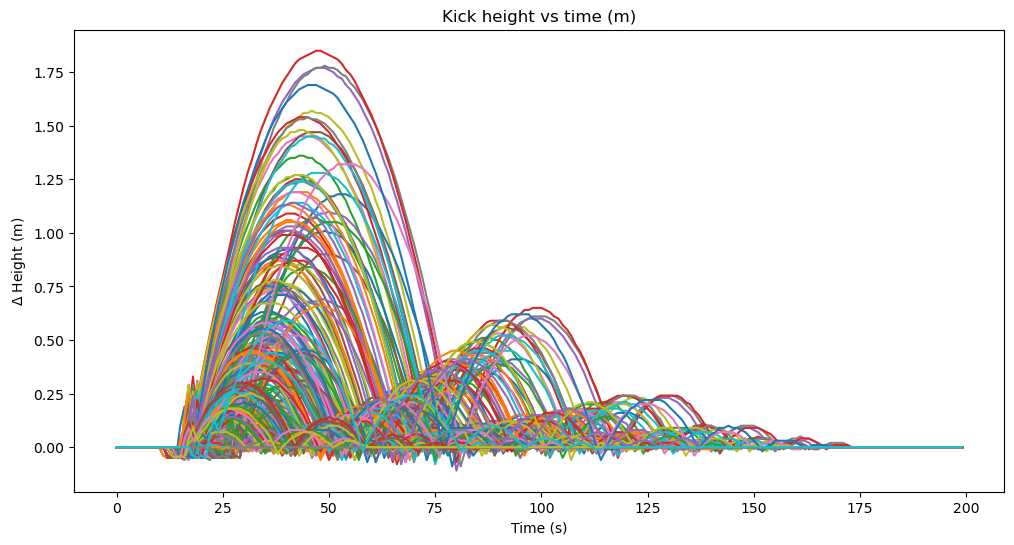

In [7]:
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1, len(kick_list))))
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6), sharey=False)
for kick in kick_list:
    ax.plot(kick[:200,-1])
ax.set_title("Kick height vs time (m)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("$\Delta$ Height (m)")

plt.show()